In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
#Importing the cleaned dataset
df = pd.read_csv('cleaned_dataset_2006_2007.csv')

In [5]:
#Checking for class balance between diverted and not diverted flights
df['Diverted'].value_counts()
#due to the cleaning process the class has no data of the diverted flights

0    14268895
Name: Diverted, dtype: int64

In [3]:
#Importing the initial 2007 dataset
df2007 = pd.read_csv(r"C:\Users\jaime\Desktop\Coursework\2007.csv.bz2")

In [7]:
#Checking the balance of the diverted class
df2007['Diverted'].value_counts()

0    7436036
1      17179
Name: Diverted, dtype: int64

In [15]:
#checking for null values
df2007.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               160748
CRSDepTime                 0
ArrTime               177927
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     177927
CRSElapsedTime           994
AirTime               177927
ArrDelay              177927
DepDelay              160748
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7292466
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

In [4]:
#dropping the unwanted columns from df2007
df2007.drop(['Year','DepTime', 'ArrTime', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'CancellationCode', 'Cancelled','UniqueCarrier','Dest','TaxiIn','TaxiOut','NASDelay','SecurityDelay'], axis=1, inplace=True)

In [5]:
#importing the airport dataset
airport_dataset = pd.read_csv(r"C:\Users\jaime\Desktop\excel for programming\airports.csv")

In [10]:
#checking for nul values in the airport dataset
airport_dataset.isnull().sum()

iata        0
airport     0
city       12
state      12
country     0
lat         0
long        0
dtype: int64

In [6]:
airport_dataset.drop(['city', 'state', 'country','airport'], axis=1, inplace=True)

In [7]:
#assuming that the iata column in the airport dataset represtents the Orgin
airport_dataset.rename(columns={"iata":"Origin"}, inplace = True)

In [8]:
#inner merging the df2007 and airport_dataset based on the Origin column to form the corr_dataset
corr_dataset = pd.merge(df2007,airport_dataset, on=['Origin'])

In [14]:
corr_dataset.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,Origin,Distance,Diverted,CarrierDelay,WeatherDelay,LateAircraftDelay,lat,long
0,1,1,1,1225,1340,SMF,389,0,0,0,0,38.695422,-121.590767
1,1,1,1,1905,2035,SMF,479,0,0,0,0,38.695422,-121.590767
2,1,1,1,2130,2300,SMF,479,0,3,0,31,38.695422,-121.590767
3,1,1,1,1200,1330,SMF,479,0,23,0,3,38.695422,-121.590767
4,1,1,1,830,1000,SMF,479,0,0,0,0,38.695422,-121.590767


C:\Users\jaime\AppData\Local\Temp\ipykernel_5680\524000964.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_dataset.corr(),cmap="BuPu",annot=True)


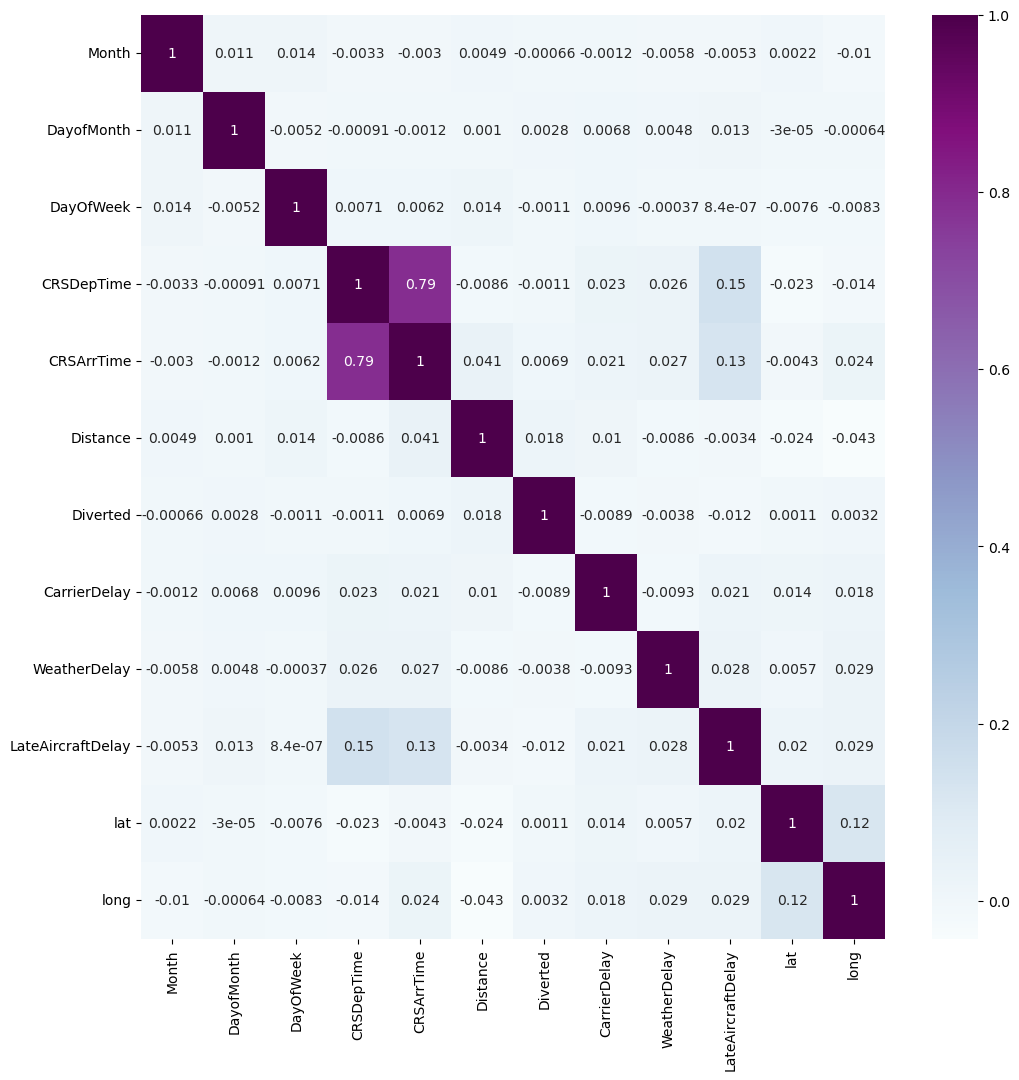

In [18]:
#Visualizing the correlation matrix
plt.figure(figsize = (12,12))
sns.heatmap(corr_dataset.corr(),cmap="BuPu",annot=True)
plt.show()

In [9]:
#dropping the unwanted columns from corr_dataset
corr_dataset.drop(['CarrierDelay','WeatherDelay','LateAircraftDelay','Origin'],axis=1, inplace=True)

In [10]:
corr_dataset.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'Distance', 'Diverted', 'lat', 'long'],
      dtype='object')

In [57]:
Features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime','Distance','Diverted', 'lat', 'long']

In [76]:
#splitting the features as X and the target as y
X=corr_dataset.drop('Diverted', axis=1)
y=corr_dataset['Diverted']

In [67]:
#training and testing 
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state=1)

In [68]:
train_x.shape

(5217250, 8)

In [69]:
test_x.shape

(2235965, 8)

In [114]:
model = LogisticRegression()
model.fit(X, y)

C:\Users\jaime\Downloads\New Folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
coefficients = model.coef_[0]
coefficients_dataframe = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient'])

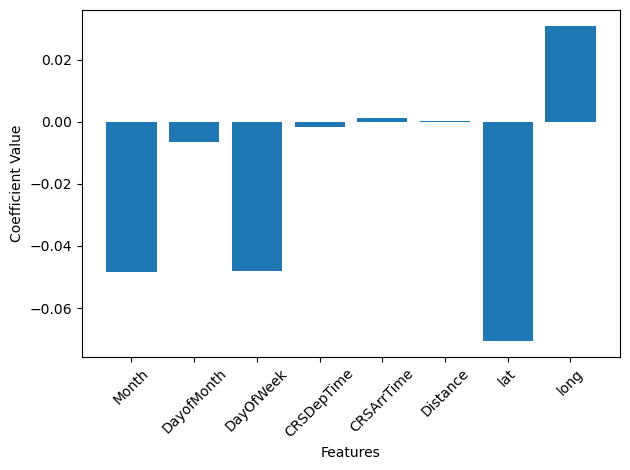

In [157]:
#visualizing the coefficients
plt.bar(coefficients_dataframe.index, coefficients_dataframe['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()